In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [10]:
import pandas as pd
iris = pd.read_csv("iris.csv")

In [11]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##We'll now convert the objects into numbers.

In [13]:
iris['Species'] = iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [14]:
iris.head() ## As you can see, all were converted

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Let us now visualize the data for better comprehension

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
palette = sns.color_palette('bright')

Text(0, 0.5, 'Sepal Width')

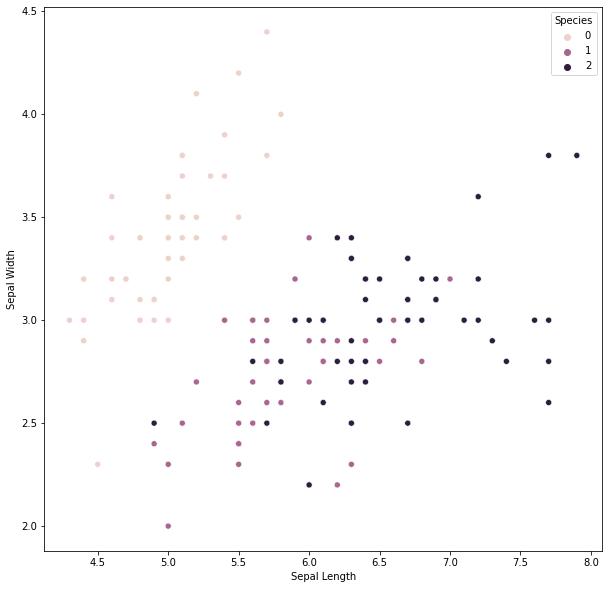

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalLength',y='SepalWidth', hue='Species', data=iris)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Text(0, 0.5, 'Petal Length')

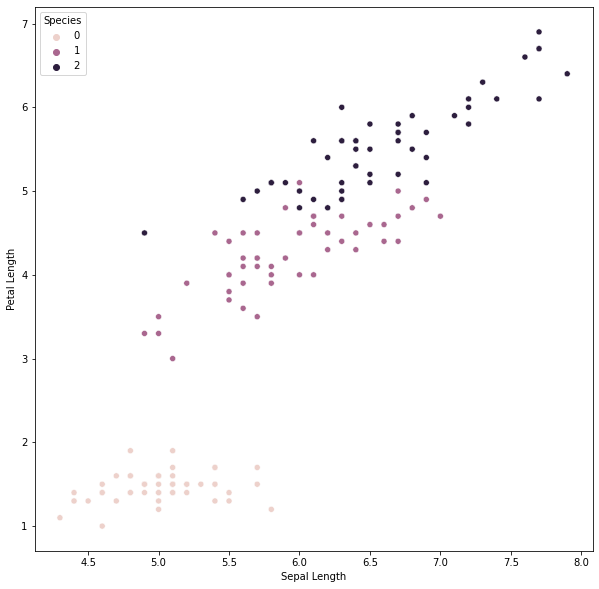

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalLength',y='PetalLength', hue='Species', data=iris)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

Text(0, 0.5, 'Petal Width')

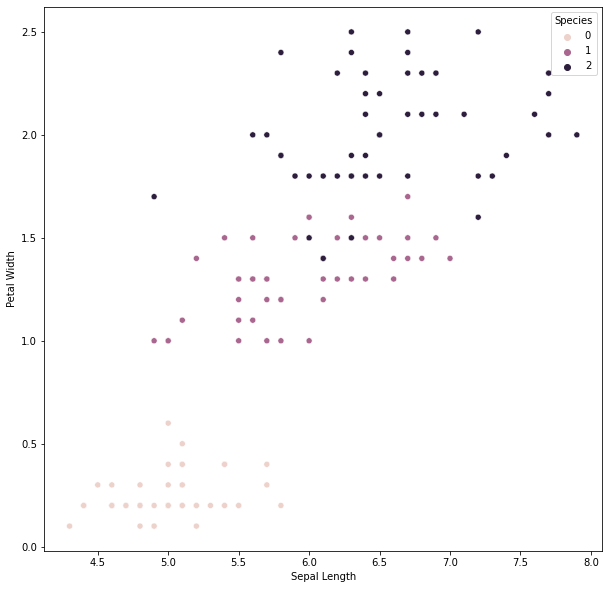

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalLength',y='PetalWidth', hue='Species', data=iris)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

Text(0, 0.5, 'Petal Length')

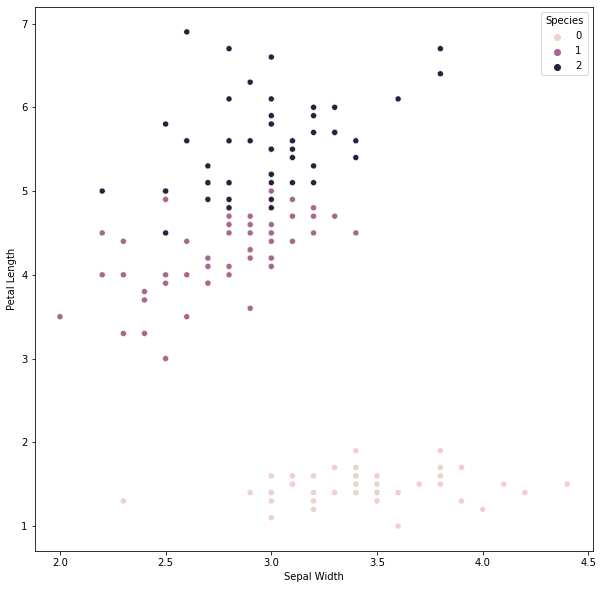

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalWidth',y='PetalLength', hue='Species', data=iris)
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")

Text(0, 0.5, 'Petal Width')

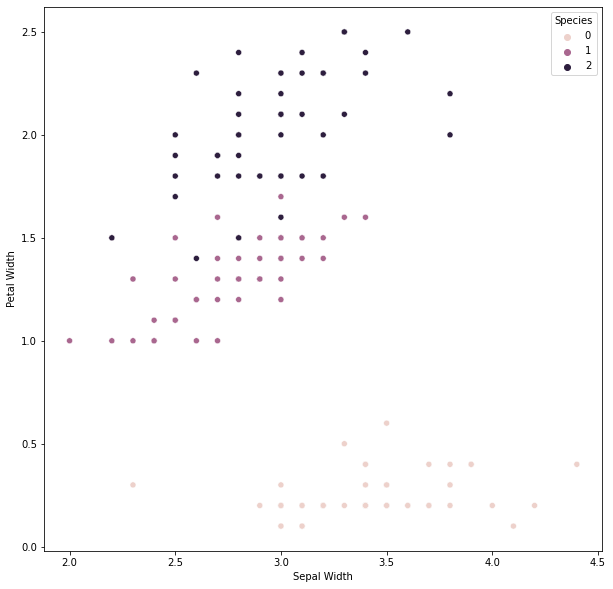

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalWidth',y='PetalWidth', hue='Species', data=iris)
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")

------------

**Explain why you chose the classification algorithm used (and why you did not use others).**

**R.:** 
We can see that the Sepal has a more confuse scatterpolot around species 1 and 2. Making it difficult for SVM to draw a plane in this situation. But, the Sepal data is very clear and maybe this can help our ML Model to predict it.

In [18]:
print(iris['Species'].value_counts()) ##Balanced dataset

0    50
1    50
2    50
Name: Species, dtype: int64


In [19]:
features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']

In [20]:
targets = ["Species"]

In [21]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(iris[features],iris[targets],test_size=0.20,random_state=0)

In [58]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [59]:
Y_train.head()

,Species
137,2
84,1
27,0
127,2
132,2


Everything is looking good so far, let's make our model

In [60]:
## Importing machine learn models

from sklearn import svm
from sklearn.metrics import classification_report

In [61]:
## efining the model

model_SVM = svm.SVC()

In [62]:
##Fitting and getting prediction

model_SVM.fit(X_train,np.ravel(Y_train))
predictions_SVM = model_SVM.predict(X_test)

**Display the results**

**Justify the performance of the classification model, based on the relevant evaluation methods**

**R.:** Even tough the data is a little bit mixed around the Versicolor and Virginica categories, our model was able to perform well withou further parameter tuning. If we have more data, we can test it further to make sure everything is okay.

In [63]:
predictions_SVM

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [64]:
##Checking how good the model performed

print(classification_report(Y_test,predictions_SVM,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



-------

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [75]:
model_DT = DecisionTreeClassifier(max_depth=3)

In [76]:
model_DT.fit(X_train,np.ravel(Y_train))
predictions_DT = model_DT.predict(X_test)            

In [77]:
print(predictions_DT)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]


In [78]:
print(classification_report(Y_test,predictions_DT,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [79]:
import graphviz

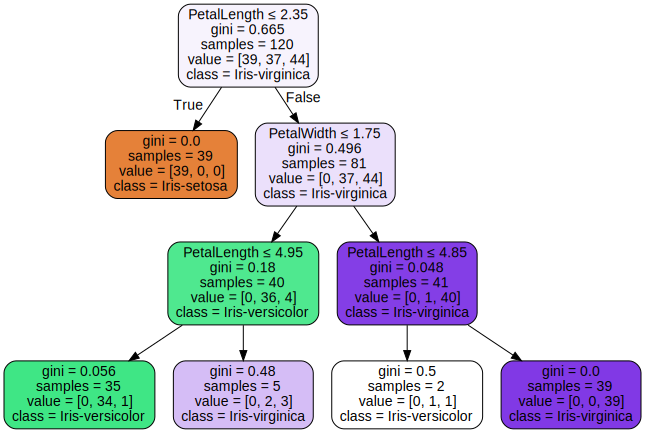

In [81]:
dot_data = tree.export_graphviz(model_DT, out_file=None, 
                      feature_names=iris[features].columns,  
                      class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data, format="png")  
graph 

We see that at the leafs, there's a category with only 2 samples, let's make the minimum to 5.

-----

In [102]:
model_DT = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [103]:
model_DT.fit(X_train,np.ravel(Y_train))
predictions_DT = model_DT.predict(X_test)            

In [104]:
print(predictions_DT)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [105]:
print(classification_report(Y_test,predictions_DT,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [106]:
import graphviz

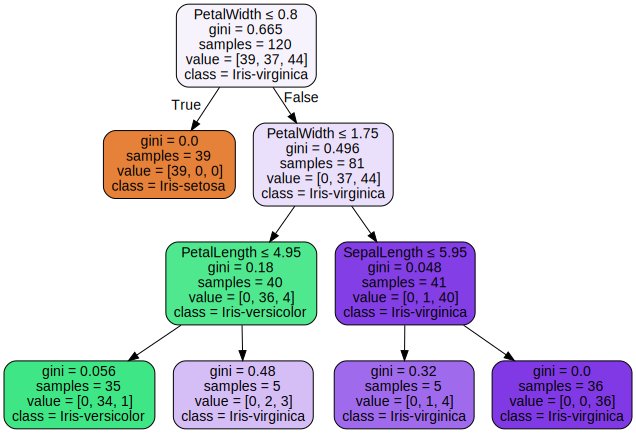

In [107]:
dot_data = tree.export_graphviz(model_DT, out_file=None, 
                      feature_names=iris[features].columns,  
                      class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data, format="png")  
graph 

Way better now!